In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import trange

import flygym.common
import flygym.mujoco
import flygym.mujoco.preprogrammed

In [2]:
run_time = 1
sim_params = flygym.mujoco.Parameters(
    timestep=1e-4, render_mode="saved", render_playspeed=0.2, draw_contacts=True
)
actuated_joints = flygym.mujoco.preprogrammed.all_leg_dofs

In [3]:
data_path = flygym.common.get_data_path("flygym", "data")
with open(data_path / "behavior" / "210902_pr_fly1.pkl", "rb") as f:
    data = pickle.load(f)

target_num_steps = int(run_time / sim_params.timestep)
data_block = np.zeros((len(actuated_joints), target_num_steps))
input_t = np.arange(len(data["joint_LFCoxa"])) * data["meta"]["timestep"]
output_t = np.arange(target_num_steps) * sim_params.timestep
for i, dof in enumerate(actuated_joints):
    data_block[i, :] = np.interp(output_t, input_t, data[dof])

In [4]:
nmf = flygym.mujoco.NeuroMechFly(
    sim_params=sim_params,
    init_pose="stretch",
    actuated_joints=actuated_joints,
    control="position",
)
obs, info = nmf.reset()
for i in trange(target_num_steps):
    # here, we simply use the recorded joint angles as the target joint angles
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

100%|██████████| 10000/10000 [01:43<00:00, 96.64it/s]


In [5]:
nmf = flygym.mujoco.NeuroMechFly(
    sim_params=sim_params,
    init_pose="stretch",
    actuated_joints=actuated_joints,
    control="position",
)
obs, info = nmf.reset()
for i in trange(target_num_steps):
    # here, we simply use the recorded joint angles as the target joint angles
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

100%|██████████| 10000/10000 [01:24<00:00, 117.81it/s]


In [6]:
nmf.save_video("./outputs/kinematic_replay.mp4")

In [7]:
from IPython.display import Video

Video("./outputs/kinematic_replay.mp4")

In [43]:
from flygym.mujoco.arena import BaseArena, FlatTerrain, GappedTerrain, BlocksTerrain, MixedTerrain


How am I suppose to create the environment with pillar ? 

Should I create on the fly gym by modifiying some code ?
Or can I create one here ?


In [64]:
# We start by creating a simple arena
flat_terrain_arena = FlatTerrain()

# Then, we add visual and olfactory features on top of it
arena = ObstacleOdorArena(
    terrain=flat_terrain_arena,
    obstacle_positions=np.array([(7.5, 0), (12.5, 5), (17.5, -5)]),
    marker_size=0.5,
    obstacle_colors=[(0.14, 0.14, 0.2, 1), (0.2, 0.8, 0.2, 1), (0.2, 0.2, 0.8, 1)],
    user_camera_settings=((13, -18, 9), (np.deg2rad(65), 0, 0), 45),
)

In [65]:
from gymnasium.utils.env_checker import check_env

contact_sensor_placements = [
    f"{leg}{segment}"
    for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    for segment in ["Tibia", "Tarsus1", "Tarsus2", "Tarsus3", "Tarsus4", "Tarsus5"]
]
sim_params = Parameters(
    render_playspeed=0.2,
    render_camera="user_cam",
    enable_vision=True,
    render_raw_vision=True,
    enable_olfaction=True,
)
nmf = HybridTurningNMF(
    sim_params=sim_params,
    arena=arena,
    spawn_pos=(13, -5, 0.2),
    spawn_orientation=(0, 0, np.pi / 2 + np.deg2rad(70)),
    contact_sensor_placements=contact_sensor_placements,
)

# check_env(nmf)

obs, info = nmf.reset()
for i in trange(int(run_time / nmf.sim_params.timestep)):
    curr_time = i * nmf.sim_params.timestep
    if curr_time < 1:
        action = np.array([1.2, 0.2])
    else:
        action = np.array([0.2, 1.2])

    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

nmf.save_video("./outputs/pillars.mp4")
Video("./outputs/pillars.mp4")

# for i in range(500):
#     obs, reward, terminated, truncated, info = nmf.step(np.zeros(2))
#     nmf.render()

# fig, ax = plt.subplots(figsize=(4, 3), tight_layout=True)
# ax.imshow(nmf._frames[-1])
# ax.axis("off")

100%|██████████| 10000/10000 [03:58<00:00, 41.86it/s]


In [57]:
obs, info = nmf.reset()
for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

nmf.save_video("./outputs/obstacles.mp4")
Video("./outputs/obstacles.mp4")

In [50]:
sim_params = flygym.mujoco.Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.2,
    draw_contacts=True,
    # =========================================================================
    # TODO:
    # =========================================================================
)

arena = FlatTerrain(
    # =========================================================================
    # TODO: 
    # =========================================================================
)

nmf = flygym.mujoco.NeuroMechFly(
    sim_params=sim_params,
    init_pose="stretch",
    actuated_joints=actuated_joints,
    control="position",
    arena=arena,
    # spawn_pos=(0, 0, 0.2),
)

obs, info = nmf.reset()
for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()


100%|██████████| 10000/10000 [01:25<00:00, 116.78it/s]


In [33]:
nmf.save_video("./outputs/kinematic_flatterrain_top.mp4")
Video("./outputs/kinematic_flatterrain_top.mp4")

In [13]:
nmf.save_video("./outputs/kinematic_flatterrain.mp4")
Video("./outputs/kinematic_flatterrain.mp4")


In [ ]:
class FlatTerrain(BaseArena):
    """Flat terrain with no obstacles.

    Attributes
    ----------
    root_element : mjcf.RootElement
        The root MJCF element of the arena.
    friction : Tuple[float, float, float]
        The sliding, torsional, and rolling friction coefficients of the
        ground, by default (1, 0.005, 0.0001).

    Parameters
    ----------
    size : Tuple[float, float], optional
        The size of the arena in mm, by default (50, 50).
    friction : Tuple[float, float, float]
        The sliding, torsional, and rolling friction coefficients of the
        ground, by default (1, 0.005, 0.0001).
    ground_alpha : float
        Opacity of the ground, by default 1 (fully opaque).
    scale_bar_pos : Tuple[float, float, float], optional
        If supplied, a 1 mm scale bar will be placed at this location.
    """

    def __init__(
        self,
        size: Tuple[float, float] = (50, 50),
        friction: Tuple[float, float, float] = (1, 0.005, 0.0001),
        ground_alpha: float = 1.0,
        scale_bar_pos: Optional[Tuple[float, float, float]] = None,
    ):
        self.root_element = mjcf.RootElement()
        ground_size = [*size, 1]
        chequered = self.root_element.asset.add(
            "texture",
            type="2d",
            builtin="checker",
            width=300,
            height=300,
            rgb1=(0.3, 0.3, 0.3),
            rgb2=(0.4, 0.4, 0.4),
        )
        grid = self.root_element.asset.add(
            "material",
            name="grid",
            texture=chequered,
            texrepeat=(10, 10),
            reflectance=0.1,
            rgba=(1.0, 1.0, 1.0, ground_alpha),
        )
        self.root_element.worldbody.add(
            "geom",
            type="plane",
            name="ground",
            material=grid,
            size=ground_size,
            friction=friction,
        )
        self.friction = friction
        if scale_bar_pos:
            self.root_element.worldbody.add(
                "geom",
                type="cylinder",
                size=(0.05, 0.5),
                pos=scale_bar_pos,
                rgba=(0, 0, 0, 1),
                euler=(0, np.pi / 2, 0),
            )

    def get_spawn_position(
        self, rel_pos: np.ndarray, rel_angle: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray]:
        return rel_pos, rel_angle

In [31]:
sim_params = flygym.mujoco.Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.2,
    draw_contacts=True,

    # =========================================================================
    # TODO:
    # =========================================================================
)

arena = FlatTerrain(
    # =========================================================================
    # TODO: add 5 scales bars to the arena
    
    scale_bar_pos= (2.5, 2.5, 1)
    # scale_bar_pos=[(1, 1,0.5),(1, 2,0.5), (1, 3,0.5), (1, 4,5), (1, 5,5)]

    # =========================================================================
)

nmf = flygym.mujoco.NeuroMechFly(
    sim_params=sim_params,
    init_pose="stretch",
    actuated_joints=actuated_joints,
    control="position",
    arena=arena,
    # spawn_pos=(0, 0, 0.2),
)

obs, info = nmf.reset()
for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

nmf.save_video("./outputs/birdeye.mp4")
Video("./outputs/birdeye.mp4")


100%|██████████| 10000/10000 [01:32<00:00, 108.28it/s]


In [30]:
# should we create new obstacle area ? take a similar example from odorarena 
# should i retake the same idea from odor arena and implement it into Flatterrain class ?
import numpy as np
from typing import Union, Tuple, List, Optional, Callable


class ObstacleArena(BaseArena):
    num_sensors = 4

    def __init__(
        self,
        terrain: BaseArena,
        obstacle_positions: np.ndarray = np.array([(7.5, 0), (12.5, 5), (17.5, -5)]),
        obstacle_colors: Union[np.ndarray, Tuple] = (0, 0, 0, 1),
        obstacle_radius: float = 1,
        obstacle_height: float = 4,
        odor_source: np.ndarray = np.array([[25, 0, 2]]),
        peak_intensity: np.ndarray = np.array([[1]]),
        diffuse_func: Callable = lambda x: x**-2,
        marker_colors: Optional[List[Tuple[float, float, float, float]]] = None,
        marker_size: float = 0.1,
        user_camera_settings: Optional[
            Tuple[Tuple[float, float, float], Tuple[float, float, float], float]
        ] = None,
    ):
        self.terrain_arena = terrain
        self.obstacle_positions = obstacle_positions
        self.root_element = terrain.root_element
        self.friction = terrain.friction
        self.obstacle_radius = obstacle_radius
        z_offset = terrain.get_spawn_position(np.zeros(3), np.zeros(3))[0][2]
        obstacle_colors = np.array(obstacle_colors)
        if obstacle_colors.shape == (4,):
            obstacle_colors = np.array(
                [obstacle_colors for _ in range(obstacle_positions.shape[0])]
            )
        else:
            assert obstacle_colors.shape == (obstacle_positions.shape[0], 4)

        self.odor_source = np.array(odor_source)
        self.peak_odor_intensity = np.array(peak_intensity)
        self.num_odor_sources = self.odor_source.shape[0]
        if self.odor_source.shape[0] != self.peak_odor_intensity.shape[0]:
            raise ValueError(
                "Number of odor source locations and peak intensities must match."
            )
        self.odor_dim = self.peak_odor_intensity.shape[1]
        self.diffuse_func = diffuse_func

        # Add markers at the odor sources
        if marker_colors is None:
            rgb = np.array([255, 127, 14]) / 255
            marker_colors = [(*rgb, 1)] * self.num_odor_sources
            num_odor_sources = self.odor_source.shape[0]
        self.marker_colors = marker_colors
        self._odor_marker_geoms = []
        for i, (pos, rgba) in enumerate(zip(self.odor_source, marker_colors)):
            pos = list(pos)
            pos[2] += z_offset
            marker_body = self.root_element.worldbody.add(
                "body", name=f"odor_source_marker_{i}", pos=pos, mocap=True
            )
            geom = marker_body.add(
                "geom", type="capsule", size=(marker_size, marker_size), rgba=rgba
            )
            self._odor_marker_geoms.append(geom)

        # Reshape odor source and peak intensity arrays to simplify future claculations
        _odor_source_repeated = self.odor_source[:, np.newaxis, np.newaxis, :]
        _odor_source_repeated = np.repeat(_odor_source_repeated, self.odor_dim, axis=1)
        _odor_source_repeated = np.repeat(
            _odor_source_repeated, self.num_sensors, axis=2
        )
        self._odor_source_repeated = _odor_source_repeated
        _peak_intensity_repeated = self.peak_odor_intensity[:, :, np.newaxis]
        _peak_intensity_repeated = np.repeat(
            _peak_intensity_repeated, self.num_sensors, axis=2
        )
        self._peak_intensity_repeated = _peak_intensity_repeated

        # Add obstacles
        self.obstacle_bodies = []
        obstacle_material = self.root_element.asset.add(
            "material", name="obstacle", reflectance=0.1
        )
        self.obstacle_z_pos = z_offset + obstacle_height / 2
        for i in range(obstacle_positions.shape[0]):
            obstacle_pos = [*obstacle_positions[i, :], self.obstacle_z_pos]
            obstacle_color = obstacle_colors[i]
            obstacle_body = self.root_element.worldbody.add(
                "body", name=f"obstacle_{i}", mocap=True, pos=obstacle_pos
            )
            self.obstacle_bodies.append(obstacle_body)
            obstacle_body.add(
                "geom",
                type="cylinder",
                size=(obstacle_radius, obstacle_height / 2),
                rgba=obstacle_color,
                material=obstacle_material,
            )

        # Add monitor cameras
        self.side_cam = self.root_element.worldbody.add(
            "camera",
            name="side_cam",
            mode="fixed",
            pos=(odor_source[0, 0] / 2, -25, 10),
            euler=(np.deg2rad(75), 0, 0),
            fovy=50,
        )
        self.back_cam = self.root_element.worldbody.add(
            "camera",
            name="back_cam",
            mode="fixed",
            pos=(-9, 0, 7),
            euler=(np.deg2rad(60), 0, -np.deg2rad(90)),
            fovy=55,
        )
        self.birdeye_cam = self.root_element.worldbody.add(
            "camera",
            name="birdeye_cam",
            mode="fixed",
            pos=(7.5, 0, 25),
            euler=(0, 0, 0),
            fovy=45,
        )
        self.birdeye_cam_origin = self.root_element.worldbody.add(
            "camera",
            name="birdeye_cam_origin",
            mode="fixed",
            pos=(0, 0, 40),
            euler=(0, 0, 0),
            fovy=50,
        )
        if user_camera_settings is not None:
            cam_pos, cam_euler, cam_fovy = user_camera_settings
            self.root_element.worldbody.add(
                "camera",
                name="user_cam",
                mode="fixed",
                pos=cam_pos,
                euler=cam_euler,
                fovy=cam_fovy,
            )

    def get_spawn_position(
        self, rel_pos: np.ndarray, rel_angle: np.ndarray
    ) -> Tuple[np.ndarray, np.ndarray]:
        return self.terrain_arena.get_spawn_position(rel_pos, rel_angle)

    def get_olfaction(self, antennae_pos: np.ndarray) -> np.ndarray:
        antennae_pos_repeated = antennae_pos[np.newaxis, np.newaxis, :, :]
        dist_3d = antennae_pos_repeated - self._odor_source_repeated  # (n, k, w, 3)
        dist_euc = np.linalg.norm(dist_3d, axis=3)  # (n, k, w)
        scaling = self.diffuse_func(dist_euc)  # (n, k, w)
        intensity = self._peak_intensity_repeated * scaling  # (n, k, w)
        return intensity.sum(axis=0)  # (k, w)

    def pre_visual_render_hook(self, physics):
        for geom, rgba in zip(self._odor_marker_geoms, self.marker_colors):
            physics.bind(geom).rgba = np.array([*rgba[:3], 0])

    def post_visual_render_hook(self, physics):
        for geom, rgba in zip(self._odor_marker_geoms, self.marker_colors):
            physics.bind(geom).rgba = np.array([*rgba[:3], 1])


In [32]:
sim_params = flygym.mujoco.Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.2,
    draw_contacts=True,
    render_camera="birdeye_cam",

    # =========================================================================
    # TODO:
    # =========================================================================
)

arena = FlatTerrain(
    # =========================================================================
    # TODO: add 5 scales bars to the arena
    
    scale_bar_pos= (2.5, 2.5, 1)
    # scale_bar_pos=[(1, 1,0.5),(1, 2,0.5), (1, 3,0.5), (1, 4,5), (1, 5,5)]

    # =========================================================================
)

nmf = flygym.mujoco.NeuroMechFly(
    sim_params=sim_params,
    init_pose="stretch",
    actuated_joints=actuated_joints,
    control="position",
    arena=arena,
    # spawn_pos=(0, 0, 0.2),
)

obs, info = nmf.reset()
for i in trange(target_num_steps):
    joint_pos = data_block[:, i]
    action = {"joints": joint_pos}
    obs, reward, terminated, truncated, info = nmf.step(action)
    nmf.render()

nmf.save_video("./outputs/birdeye.mp4")
Video("./outputs/birdeye.mp4")


Error: Object of type 'camera' with name 'birdeye_cam' does not exist.

In [38]:
from flygym.mujoco.arena import OdorArena

import numpy as np

# random state seed for reproducibility
seed = 1

# Odor source: array of shape (num_odor_sources, 3) - xyz coords of odor sources
odor_source = np.array([[24, 0, 1.5], [8, -4, 1.5], [16, 4, 1.5]])

# Peak intensities: array of shape (num_odor_sources, odor_dimensions)
# For each odor source, if the intensity is (x, 0) then the odor is in the 1st dimension
# (in this case attractive). If it's (0, x) then it's in the 2nd dimension (in this case
# aversive)
peak_odor_intensity = np.array([[1, 0], [0, 1], [0, 1]])

# Marker colors: array of shape (num_odor_sources, 4) - RGBA values for each marker,
# normalized to [0, 1]
marker_colors = [[255, 127, 14], [31, 119, 180], [31, 119, 180]]
marker_colors = np.array([[*np.array(color) / 255, 1] for color in marker_colors])

odor_dimensions = len(peak_odor_intensity[0])

arena = OdorArena(
    odor_source=odor_source,
    peak_intensity=peak_odor_intensity,
    diffuse_func=lambda x: x**-2,
    marker_colors=marker_colors,
    marker_size=0.3,
)

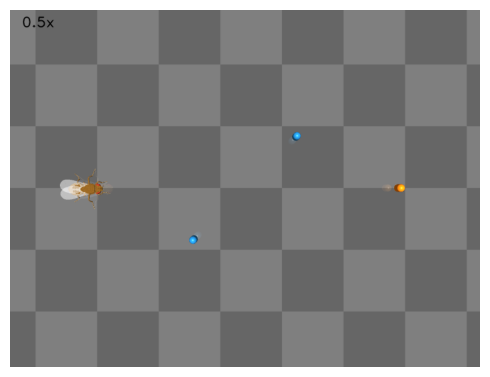

In [39]:
from pathlib import Path
import matplotlib.pyplot as plt
from flygym.mujoco import Parameters
from flygym.mujoco.examples.turning_controller import HybridTurningNMF


Path("./outputs").mkdir(exist_ok=True)


contact_sensor_placements = [
    f"{leg}{segment}"
    for leg in ["LF", "LM", "LH", "RF", "RM", "RH"]
    for segment in ["Tibia", "Tarsus1", "Tarsus2", "Tarsus3", "Tarsus4", "Tarsus5"]
]
sim_params = Parameters(
    timestep=1e-4,
    render_mode="saved",
    render_playspeed=0.5,
    render_window_size=(800, 608),
    enable_olfaction=True,
    enable_adhesion=True,
    draw_adhesion=False,
    render_camera="birdeye_cam",
)
sim = HybridTurningNMF(
    sim_params=sim_params,
    arena=arena,
    spawn_pos=(0, 0, 0.2),
    contact_sensor_placements=contact_sensor_placements,
)
for i in range(500):
    sim.step(np.zeros(2))
    sim.render()
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)
ax.imshow(sim._frames[-1])
ax.axis("off")
fig.savefig("./outputs/olfaction_env.png")